# This is an EDA of the data contained in the text files 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

## Load the Dataframe 

In [4]:
df = pd.read_csv("/Users/ryanoconnor/Desktop/data/data_small/TG_STAID000001.txt",skiprows=20,parse_dates=["    DATE"])

In [5]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Examine the columns

In [22]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

## Filtering and Descriptive Statistics 

In [27]:
# Filtering the missing data from the temperature column (values listed as -9999)
# Calculate the mean of the fileterd data
# Divide mean by 10 as data are scaled for better storage 

df.loc[df['   TG']!= -9999]['   TG'].mean()/10 # divide by 10 as data are scaled for better storage 

6.360787526128467

In [33]:
# Get the max temperature 

df.loc[df['   TG']!= -9999]['   TG'].max()/10

26.2

In [35]:
# Get the mean temperature 

df.loc[df['   TG']!= -9999]['   TG'].min()/10

-28.8

Note: Data are scaled by 10


<AxesSubplot:>

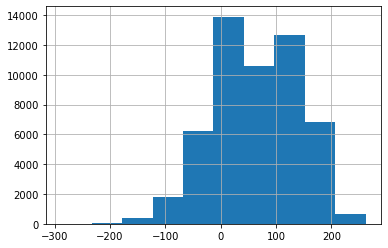

In [38]:
# Histogram 
print("Note: Data are scaled by 10")
df.loc[df['   TG']!= -9999]['   TG'].hist()

## Access a specific value in a column 
### This will be used to access the date for a specific day 

In [58]:
# Access the temperature on a specific day 

print(f"""The temperature on 1860-01-05 was: \
{df.loc[df['    DATE']=="1860-01-05"]['   TG'].squeeze()/10} degrees celsius""")

The temperature on 1860-01-05 was: 3.1 degrees celsius


In [62]:
# Access the day when the temperature was the highest 
df.loc[df['   TG']== df['   TG'].max()]['    DATE'].squeeze() 

Timestamp('1868-08-16 00:00:00')

## Make a new temperatue column that is not scaled by 10 to stop having to divide all the values by 10 

In [70]:
# Make a new column to remove the -9999 values from the temperature columns and replace them with null 
import numpy as np 
df["TG0"] = df['   TG'].mask(df['   TG']==-9999,np.nan) 

In [71]:
# Make a new, non scaled, temp column containing no null values 
df["TG"] = df['TG0']/10
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0
0,1,35381,1860-01-01,21,0,2.1,21.0
1,1,35381,1860-01-02,46,0,4.6,46.0
2,1,35381,1860-01-03,31,0,3.1,31.0
3,1,35381,1860-01-04,37,0,3.7,37.0
4,1,35381,1860-01-05,31,0,3.1,31.0
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


In [73]:
# Add a fahrenheit column 
df['fahrenheit'] = df['TG'] * 9/5 + 32
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0,fahrenheit
0,1,35381,1860-01-01,21,0,2.1,21.0,35.78
1,1,35381,1860-01-02,46,0,4.6,46.0,40.28
2,1,35381,1860-01-03,31,0,3.1,31.0,37.58
3,1,35381,1860-01-04,37,0,3.7,37.0,38.66
4,1,35381,1860-01-05,31,0,3.1,31.0,37.58
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


## Plotting 

<AxesSubplot:xlabel='    DATE'>

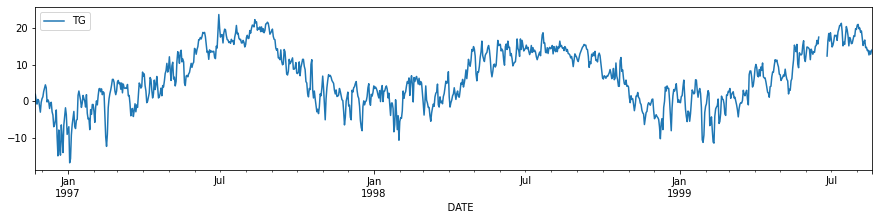

In [78]:
# Plot the data from a specific boundary of rows 
df[50000:51000].plot(x='    DATE',y='TG',figsize=(15,3))